In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df=pd.read_csv('world_happiness_report.csv')

In [18]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [20]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [21]:
df.shape

(156, 9)

In [23]:
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000


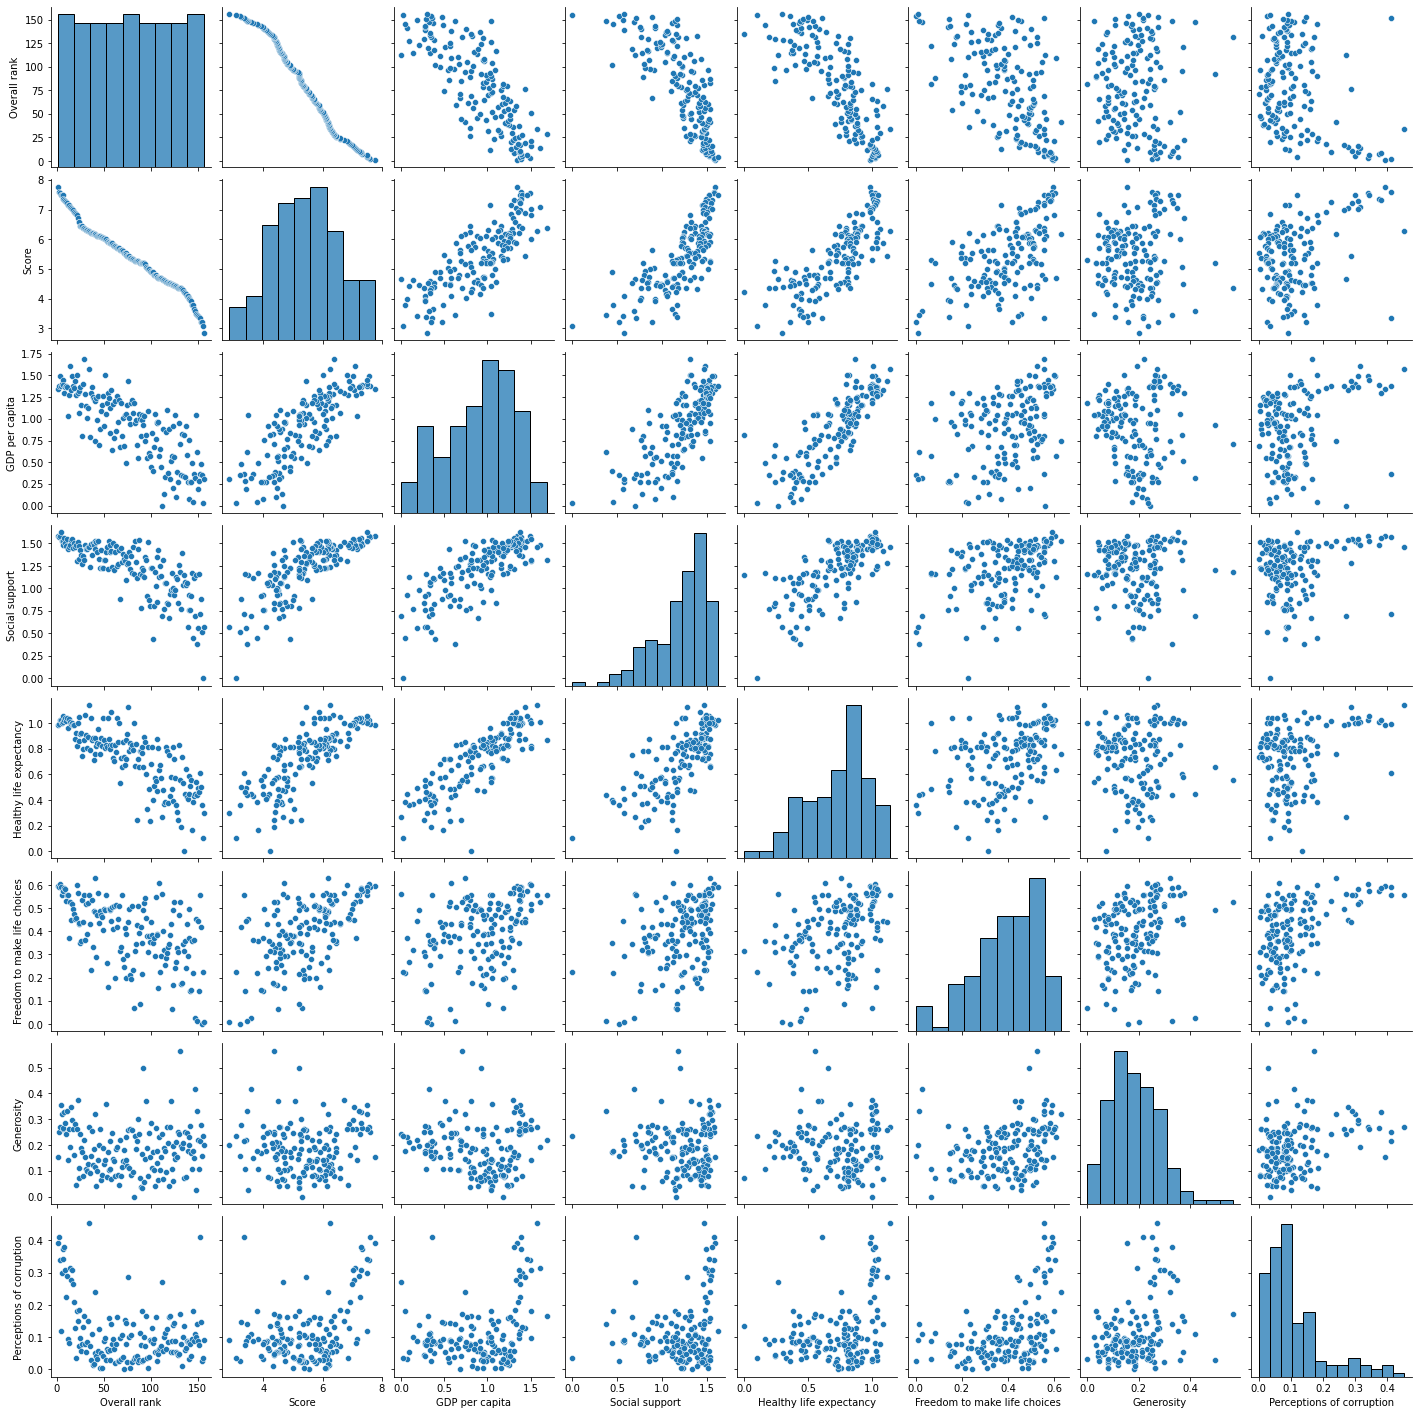

In [24]:
sns.pairplot(df)

Top 10 countries for each attribute

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Country or region'>

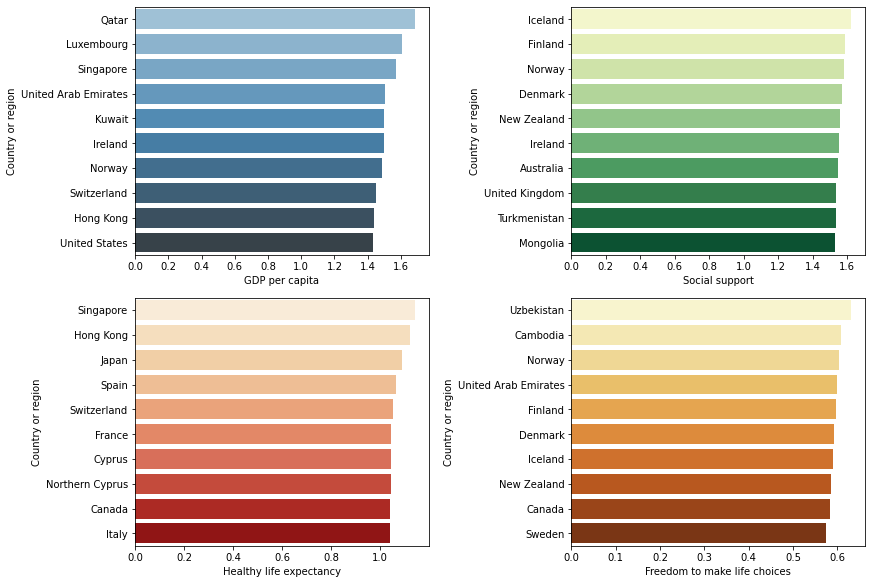

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Country or region'>

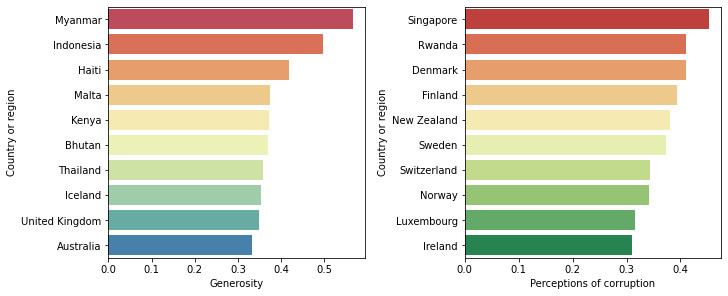

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

Now I want to give a category to each country as High,Mid and Low according to their happiness scores.Thus we have to find out the bound in which these categories shall lie in.

In [27]:
print('max:',df['Score'].max())
print('min:',df['Score'].min())
add=df['Score'].max()-df['Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.769
min: 2.853
range difference: 1.639


In [28]:
low=df['Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Score'].max())

upper bound of Low grp 4.492
upper bound of Mid grp 6.131
upper bound of High grp max: 7.769


Finally adding a new column Category to the data set and distributing the levels High,Low,Mid.

In [29]:
cat=[]
for i in df.Score:
    if(i>0 and i<low):
        cat.append('Low')
        
        
    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

df['Category']=cat  

In [30]:
color = (df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
df.style.apply(lambda s: color)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,High
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000,High
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000,High
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000,High
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000,High
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,High
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,High
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000,High
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000,High
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000,High


In [31]:
df.loc[df['Country or region']=='India']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
139,140,India,4.015,0.755,0.765,0.588,0.498,0.2,0.085,Low


# Social Support vs GDP per capita vs Healthy life expectancy

In [32]:
data={
    'Country or region':['Canada','US','UK','India'],
    'Score':[7.278,6.892,7.054,4.015],
    'GDP per capita':[1.365,1.433,1.333,0.755],
    'Social support':[1.505,1.457,1.538,0.765],
    'Healthy life expectancy':[1.039,0.874,0.996,0.588],
    'Freedom to make life choices':[0.584,0.454,0.45,0.498],
    'Generosity':[0.285,0.28,0.348,0.2],
    'Perceptions of corruption':[0.308,0.128,0.278,0.085]
}
d=pd.DataFrame(data)
d

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
1,US,6.892,1.433,1.457,0.874,0.454,0.280,0.128
2,UK,7.054,1.333,1.538,0.996,0.450,0.348,0.278
3,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085


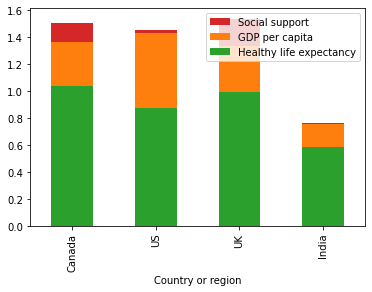

In [33]:
ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()

# Freedom to make life choices vs Generosity vs Corruption

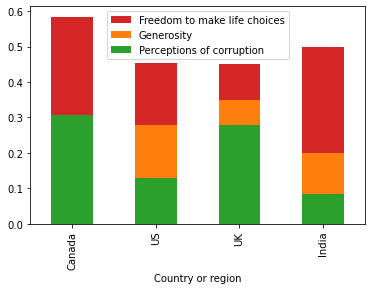

In [34]:
ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C3')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C2",)

plt.show()